# Gen AI Assignment 2
Nathan Willemsen

Prof. Narahara Chari Dingari, Ph.D.

January 16, 2025

Assignment Instructions:
Use the Penguins dataset open source dataset, focusing on two species only (e.g., Adelie and Gentoo), to compare the performance of Naive Bayes (Generative Model) and Logistic Regression (Discriminative Model). Please ensure to upload your Jupyter Lab Notebook along with the corresponding code and markdown explanations on GitHub. Once complete, share the repository link for submission.

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Keep only Adelie and Gentoo species
df = df[df['species'].isin(['Adelie', 'Gentoo'])]

# Drop rows with missing values
df = df.dropna().reset_index(drop=True)

print(df.head())
# print(df.info())

# split into train and test sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")
print(train_df['island'].unique())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       3450.0  Female  
4       3650.0    Male  
Train shape: (212, 7), Test shape: (53, 7)
['Biscoe' 'Dream' 'Torgersen']


### Naive Bayes

In [ ]:
class NaiveBayesClassifier:    
    def __init__(self, var_smoothing=1e-9):
        self.class_priors = {}
        self.means = {}
        self.variances = {}
        self.classes = None
        self.var_smoothing = var_smoothing
    
    def fit(self, X, y):
        # Convert inputs to numpy float arrays
        if hasattr(X, 'values'):
            X = X.values.astype(float)
        else:
            X = np.array(X, dtype=float)
        
        if hasattr(y, 'values'):
            y = np.array(y.values).ravel()
        else:
            y = np.array(y).ravel()
        
        self.classes = np.unique(y)
        n_samples = len(y)
        
        for cls in self.classes:
            X_cls = X[y == cls]
            self.class_priors[cls] = len(X_cls) / n_samples
            self.means[cls] = np.mean(X_cls, axis=0)
            self.variances[cls] = np.var(X_cls, axis=0) + self.var_smoothing
    
    def predict_proba(self, X):
        # Convert to numpy float array
        if hasattr(X, 'values'):
            X = X.values.astype(float)
        else:
            X = np.array(X, dtype=float)
        
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        log_probs = np.zeros((n_samples, n_classes))
        
        for idx, cls in enumerate(self.classes):
            mean = self.means[cls]
            var = self.variances[cls]
            
            # Log prior
            log_prior = np.log(self.class_priors[cls])
            
            # Log likelihood (Gaussian)
            log_likelihood = -0.5 * np.sum(
                np.log(2 * np.pi * var) + ((X - mean) ** 2) / var,
                axis=1
            )
            log_probs[:, idx] = log_prior + log_likelihood
        
        # Convert to probabilities via softmax
        log_probs -= np.max(log_probs, axis=1, keepdims=True)
        probs = np.exp(log_probs)
        probs /= np.sum(probs, axis=1, keepdims=True)
        return probs
    
    def predict(self, X):
        probs = self.predict_proba(X)
        predicted_indices = np.argmax(probs, axis=1)
        return self.classes[predicted_indices]


### Logistic Regression

In [ ]:
class LogisticRegressionClassifier:
     # Logistic Regression Classifier using scikit-learn wrapper    
    def __init__(self, max_iter=10000):
        from sklearn.linear_model import LogisticRegression
        self.model = LogisticRegression(max_iter=max_iter)
    
    def fit(self, X, y):
        # Convert inputs
        if hasattr(X, 'values'):
            X = X.values.astype(float)
        if hasattr(y, 'values'):
            y = np.array(y.values).ravel()
        self.model.fit(X, y)
    
    def predict(self, X):
        if hasattr(X, 'values'):
            X = X.values.astype(float)
        return self.model.predict(X)
    
    def predict_proba(self, X):
        if hasattr(X, 'values'):
            X = X.values.astype(float)
        return self.model.predict_proba(X)

## 1. Accuracy Comparison

- Evaluate and report the accuracy of both the Naive Bayes and Logistic Regression models on the training and test datasets.
- Compare the performance of these models in terms of accuracy to determine which model better distinguishes between the two penguin species. Provide a brief explanation of your findings.

In [12]:
from sklearn.metrics import accuracy_score, classification_report

# use Naive Bayes and Logistic Regression to classify species
feature_cols = ['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
X_train = train_df[feature_cols]
y_train = train_df['species']   
X_test = test_df[feature_cols]
y_test = test_df['species']

# convert categorical features to numeric using one-hot encoding
X_train = pd.get_dummies(X_train, columns=['island', 'sex'])
X_test = pd.get_dummies(X_test, columns=['island', 'sex'])

# Train and evaluate Naive Bayes Classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
print("Naive Bayes Classifier Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

# Train and evaluate Logistic Regression Classifier
lr_classifier = LogisticRegressionClassifier()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
print("Logistic Regression Classifier Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

Naive Bayes Classifier Accuracy: 0.8301886792452831
              precision    recall  f1-score   support

      Adelie       1.00      0.73      0.84        33
      Gentoo       0.69      1.00      0.82        20

    accuracy                           0.83        53
   macro avg       0.84      0.86      0.83        53
weighted avg       0.88      0.83      0.83        53

Logistic Regression Classifier Accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        33
      Gentoo       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



We can see that both Naive Bayes and Logistic Regression models performed well in binary prediction between Adelie and Gentoo penguin species.

In [13]:
print("Naive Bayes Classifier Accuracy:", accuracy_score(y_test, nb_predictions))
print("Logistic Regression Classifier Accuracy:", accuracy_score(y_test, lr_predictions))

Naive Bayes Classifier Accuracy: 0.8301886792452831
Logistic Regression Classifier Accuracy: 1.0


## 2. AUC (Area Under the ROC Curve) Comparison

- Calculate the AUC for both Naive Bayes and Logistic Regression on the training and test datasets.
- Interpret the AUC values for both models to assess how effectively each model discriminates between the two penguin species.
- Provide insights into which model is more effective based on the AUC metric.

In [14]:
# Calculate the AUC for both classifiers on both training and test sets
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Binarize labels
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_test_binarized = lb.transform(y_test)

# Get probability scores
nb_train_probs = nb_classifier.predict_proba(X_train)
nb_test_probs = nb_classifier.predict_proba(X_test)
lr_train_probs = lr_classifier.model.predict_proba(X_train)
lr_test_probs = lr_classifier.model.predict_proba(X_test)

# For binary classification, use probability of positive class (index 1)
# For multiclass, use all probabilities with multi_class parameter
if len(lb.classes_) == 2:
    # Binary case: use probability of second class (e.g., Gentoo)
    nb_train_auc = roc_auc_score(y_train_binarized, nb_train_probs[:, 1])
    nb_test_auc = roc_auc_score(y_test_binarized, nb_test_probs[:, 1])
    lr_train_auc = roc_auc_score(y_train_binarized, lr_train_probs[:, 1])
    lr_test_auc = roc_auc_score(y_test_binarized, lr_test_probs[:, 1])
else:
    # Multiclass case
    nb_train_auc = roc_auc_score(y_train_binarized, nb_train_probs, multi_class='ovr', average='weighted')
    nb_test_auc = roc_auc_score(y_test_binarized, nb_test_probs, multi_class='ovr', average='weighted')
    lr_train_auc = roc_auc_score(y_train_binarized, lr_train_probs, multi_class='ovr', average='weighted')
    lr_test_auc = roc_auc_score(y_test_binarized, lr_test_probs, multi_class='ovr', average='weighted')

print(f"Naive Bayes Train AUC: {nb_train_auc:.4f}, Test AUC: {nb_test_auc:.4f}")
print(f"Logistic Regression Train AUC: {lr_train_auc:.4f}, Test AUC: {lr_test_auc:.4f}")

Naive Bayes Train AUC: 1.0000, Test AUC: 1.0000
Logistic Regression Train AUC: 1.0000, Test AUC: 1.0000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## 3. Lift and Gain Charts

- Generate Lift and Gain charts for both Naive Bayes and Logistic Regression using 10 deciles.
- Use a dual y-axis plot with deciles on the x-axis, and Lift and Gain on the y-axis.
- Evaluate the Lift and Gain charts to understand how well each model ranks the predicted probabilities and how effective each model is in prioritizing the classification of the two species.

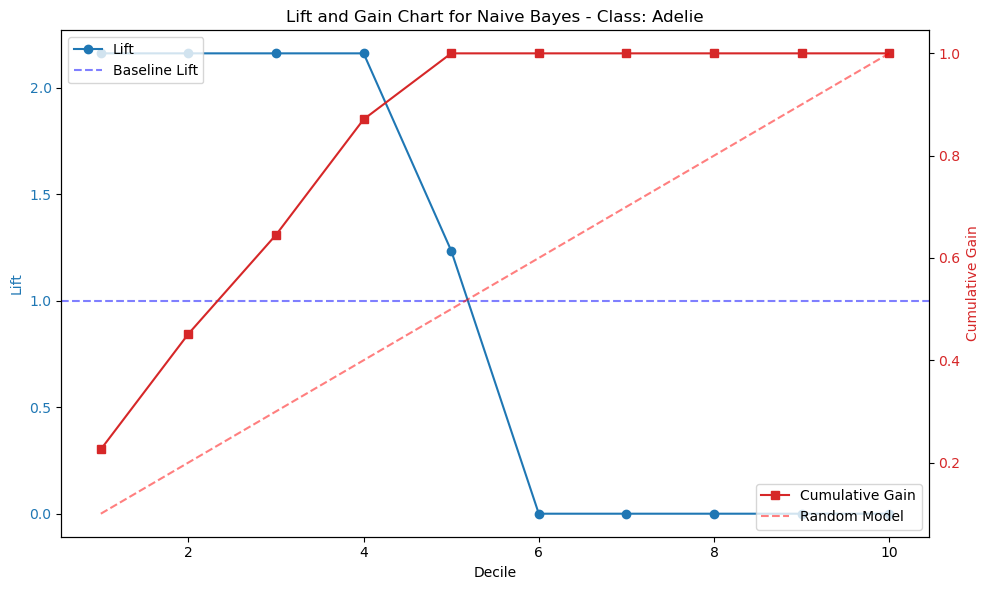

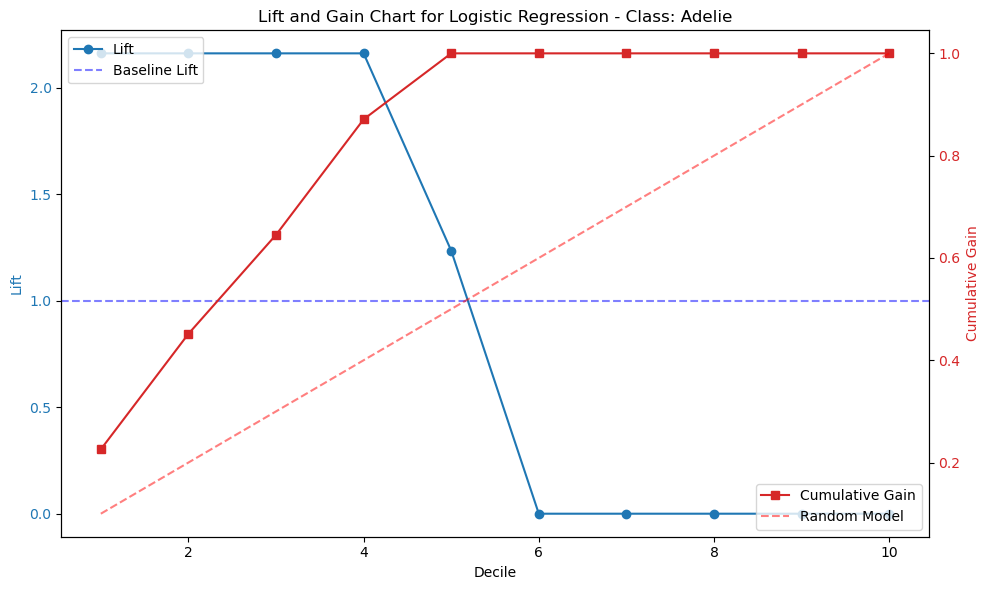

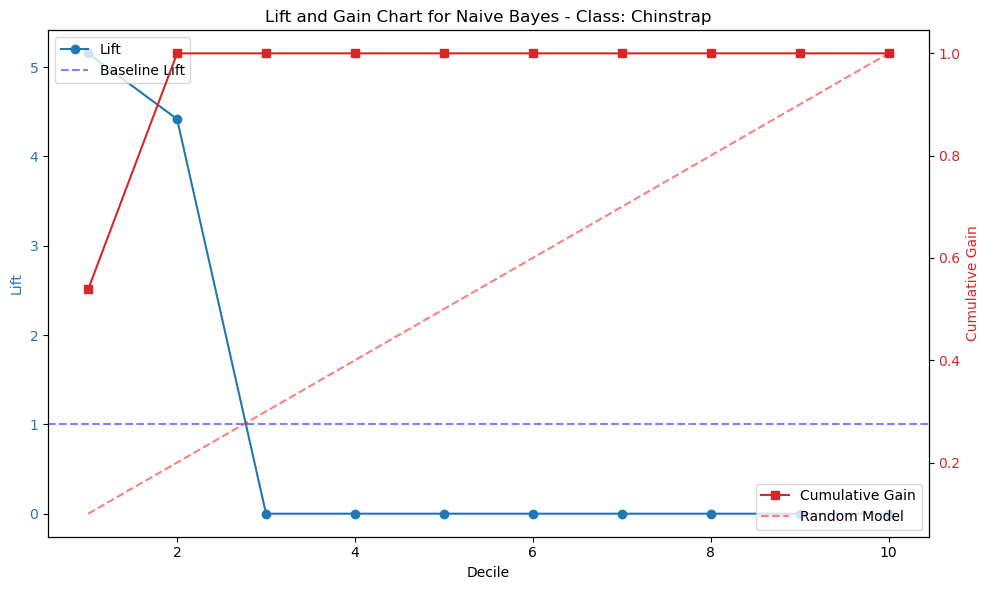

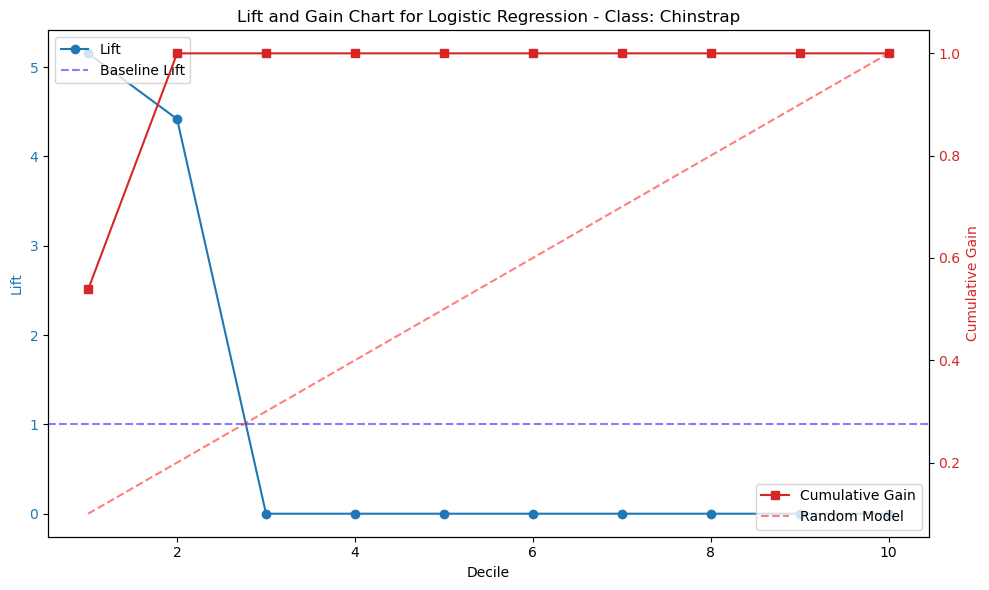

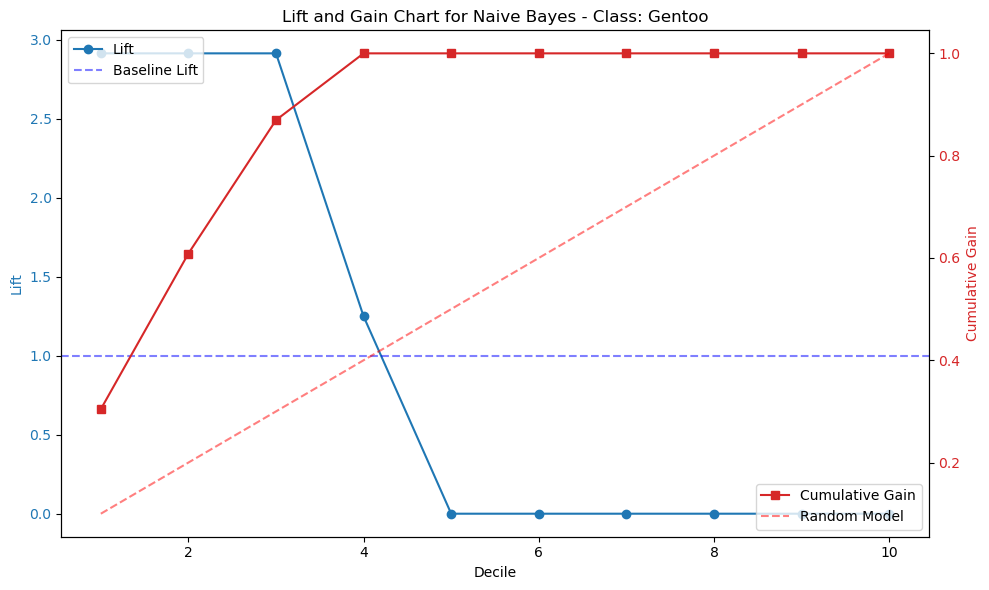

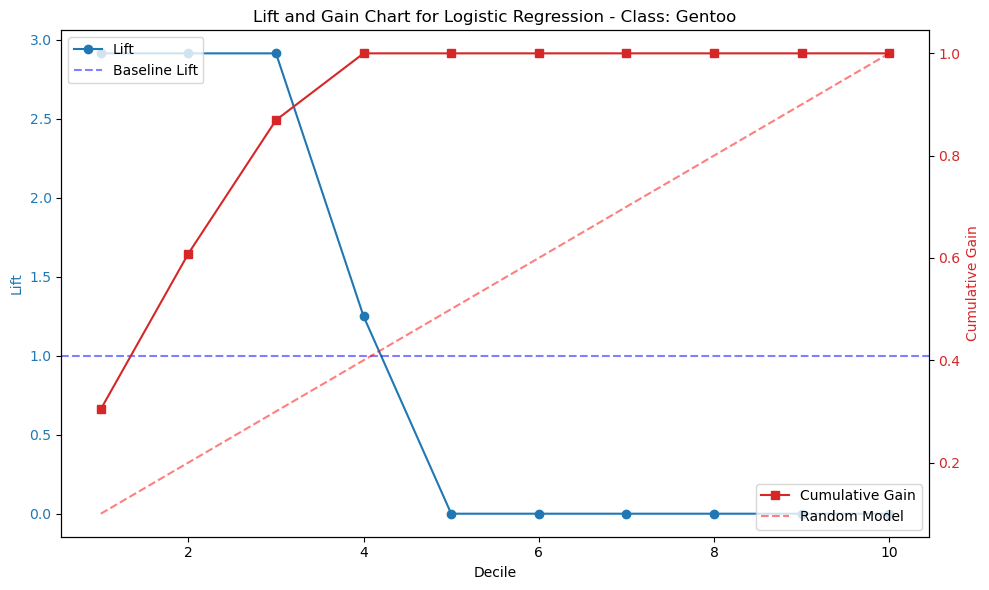

In [7]:
# Generate Lift and Gain charts for both classifiers using 10 deciles
import matplotlib.pyplot as plt
import numpy as np

def plot_lift_gain(y_true, y_scores, model_name, class_name, class_idx):
    """
    y_true: 1D array of binary labels (1 for positive class, 0 otherwise)
    y_scores: 1D array of probability scores for the positive class
    """
    data = pd.DataFrame({'y_true': y_true, 'y_scores': y_scores})
    data = data.sort_values(by='y_scores', ascending=False).reset_index(drop=True)
    data['decile'] = pd.qcut(data.index, 10, labels=False, duplicates='drop')

    lift = []
    cumulative_gain = []
    total_positives = data['y_true'].sum()
    baseline_rate = total_positives / len(data)
    
    cumulative_pos = 0
    for decile in range(data['decile'].nunique()):
        decile_data = data[data['decile'] == decile]
        decile_positives = decile_data['y_true'].sum()
        cumulative_pos += decile_positives
        
        # Lift: ratio of response rate in decile to overall response rate
        decile_rate = decile_positives / len(decile_data) if len(decile_data) > 0 else 0
        lift.append(decile_rate / baseline_rate if baseline_rate > 0 else 0)
        
        # Cumulative Gain: cumulative % of positives captured
        cumulative_gain.append(cumulative_pos / total_positives if total_positives > 0 else 0)

    deciles = np.arange(1, len(lift) + 1)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Decile')
    ax1.set_ylabel('Lift', color=color)
    ax1.plot(deciles, lift, marker='o', color=color, label='Lift')
    ax1.axhline(y=1, color='blue', linestyle='--', alpha=0.5, label='Baseline Lift')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Cumulative Gain', color=color)
    ax2.plot(deciles, cumulative_gain, marker='s', color=color, label='Cumulative Gain')
    ax2.plot(deciles, deciles / len(deciles), color='red', linestyle='--', alpha=0.5, label='Random Model')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='lower right')

    plt.title(f'Lift and Gain Chart for {model_name} - Class: {class_name}')
    plt.tight_layout()
    plt.show()

# Plot for each class
classes = lb.classes_
for idx, class_name in enumerate(classes):
    # Extract binary labels and scores for this class
    y_test_binary = y_test_binarized[:, idx]
    
    nb_scores = nb_test_probs[:, idx]
    lr_scores = lr_test_probs[:, idx]
    
    plot_lift_gain(y_test_binary, nb_scores, "Naive Bayes", class_name, idx)
    plot_lift_gain(y_test_binary, lr_scores, "Logistic Regression", class_name, idx)

## 4. Model Performance Comparison

- Based on the results from accuracy, AUC, and Lift/Gain charts, compare the overall performance of Naive Bayes and Logistic Regression models.
- Discuss which model performs better in classifying the two penguin species and provide reasons for your conclusion.

Both models performed well on this dataset, specifically when limiting the data to only train on Adile and Gentoo specicies. However, when generalizing it to multi-class classificication, it broke down for the Naive Bayes more. 



## 5. Performance on a Complex Dataset:
- Extend your analysis by applying both Naive Bayes and Logistic Regression to a more complex dataset, such as MNIST (handwritten digits).
- Compare how the performance of generative models (e.g., Naive Bayes) and discriminative models (e.g., Logistic Regression) differs when dealing with image data (MNIST) compared to the two-species penguin dataset.
- Discuss the differences in performance and behavior across these datasets.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Normalize pixel values to 0-1
X = X / 255.0

# Split into train/test (MNIST has standard 60k/10k split)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Train and evaluate Naive Bayes
print("\n\nTraining Naive Bayes...")
mnist_nb = NaiveBayesClassifier()
mnist_nb.fit(X_train, y_train)
mnist_nb_predictions = mnist_nb.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, mnist_nb_predictions):.4f}")
print(classification_report(y_test, mnist_nb_predictions))

# Train and evaluate Logistic Regression
print("\nTraining Logistic Regression ...")
mnist_lr = LogisticRegressionClassifier()
mnist_lr.fit(X_train, y_train)
mnist_lr_predictions = mnist_lr.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, mnist_lr_predictions):.4f}")
print(classification_report(y_test, mnist_lr_predictions))

Loading MNIST dataset...
Training set: (60000, 784), Test set: (10000, 784)

Training Naive Bayes...
Naive Bayes Accuracy: 0.5678
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       980
           1       0.84      0.95      0.89      1135
           2       0.91      0.29      0.44      1032
           3       0.72      0.38      0.50      1010
           4       0.88      0.19      0.32       982
           5       0.58      0.06      0.11       892
           6       0.66      0.93      0.77       958
           7       0.88      0.29      0.43      1028
           8       0.29      0.67      0.41       974
           9       0.38      0.94      0.54      1009

    accuracy                           0.57     10000
   macro avg       0.69      0.56      0.53     10000
weighted avg       0.70      0.57      0.53     10000


Training Logistic Regression (this may take a minute)...
Logistic Regression Accuracy: 0.9259
              pr

We can see the Logistic Regression performed much better than the Naive Bayes, as this discriminitive model doesn't need to use resources that model the input features, rather build the boundary between classes in the input space. 